In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch as th
import cmasher as cmr
import os
import seaborn

os.makedirs("img", exist_ok=True)
seaborn.set_style('whitegrid')
cmap = cmr.get_sub_cmap('plasma', 0.4, 1)

import matplotlib as mpl

mpl.rcParams["axes.titlesize"] = 8.
mpl.rcParams["axes.labelsize"] = 7.
mpl.rcParams["font.size"] = 8.
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.serif'] = ['cm']
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.serif'] = ['CMU']

/var/folders/n1/bxdrmv296493f6tbg9v8pjnh0000gn/T/ipykernel_52312/2503526738.py:3: RuntimeWarning: invalid value encountered in log
  r"-\log(x)": -np.log(x),
/var/folders/n1/bxdrmv296493f6tbg9v8pjnh0000gn/T/ipykernel_52312/2503526738.py:5: RuntimeWarning: invalid value encountered in log
  r"x\log(x)": x*np.log(x),
/var/folders/n1/bxdrmv296493f6tbg9v8pjnh0000gn/T/ipykernel_52312/2503526738.py:3: RuntimeWarning: invalid value encountered in log
  r"-\log(x)": -np.log(x),
/var/folders/n1/bxdrmv296493f6tbg9v8pjnh0000gn/T/ipykernel_52312/2503526738.py:5: RuntimeWarning: invalid value encountered in log
  r"x\log(x)": x*np.log(x),
/var/folders/n1/bxdrmv296493f6tbg9v8pjnh0000gn/T/ipykernel_52312/2503526738.py:29: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(x, func + x*np.log(x) + (1-x)*np.log(1-x), label=label)
/var/folders/n1/bxdrmv296493f6tbg9v8pjnh0000gn/T/ipykernel_52312/2503526738.py:29: RuntimeWarning: invalid value encountered in multiply
  axs[1].plot(x, func + x*

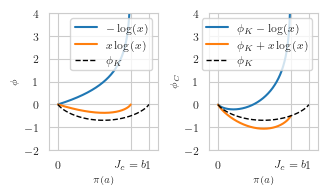

In [2]:
def phi(x):
    return {
        r"-\log(x)": -np.log(x),
        # r"-\log(\frac{x}{1+x})": -np.log(x/(1+x)),
        r"x\log(x)": x*np.log(x),
        # r"x\log(x) + (1-x)\log(1-x)": x*np.log(x) + (1-x)*np.log(1-x)
    }

_, axs = plt.subplots(1, 2, figsize=(3.32, 2))

x = np.linspace(0+1e-6, 1-1e-6, 1000)
b = .8
for i, (latex, func) in enumerate(phi(1-x/b).items()):
    axs[0].plot(x, func, label=f"${latex}$")
axs[0].plot(x, x*np.log(x) + (1-x)*np.log(1-x), label=r"$\phi_K$", linestyle="dashed", color="black", linewidth=1)
axs[0].legend()
axs[0].set_xlim(-0.1, 1.1)
axs[0].set_ylim(-2, 4)
axs[0].set_xlabel(r"$\pi(a)$")
axs[0].set_ylabel(r"$\phi$")

axs[0].set_xticks([0., b, 1.])
axs[0].set_xticklabels(["0", r"$J_c = b$", "1"])

x = np.linspace(0, 1., 1000)
b = .8
for i, (latex, func) in enumerate(phi(1-x/b).items()):
    label = f"$\phi_K {latex}$" if i == 0 else f"$\phi_K + {latex}$"
    axs[1].plot(x, func + x*np.log(x) + (1-x)*np.log(1-x), label=label)
axs[1].plot(x, x*np.log(x) + (1-x)*np.log(1-x), label=r"$\phi_K$", linestyle="dashed", color="black", linewidth=1)
axs[1].legend()
axs[1].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-2, 4)
axs[1].set_xlabel(r"$\pi(a)$")
axs[1].set_ylabel(r"$\phi_C$")

axs[1].set_xticks([0., b, 1.])
axs[1].set_xticklabels(["0", r"$J_c = b$", "1"])

plt.tight_layout()

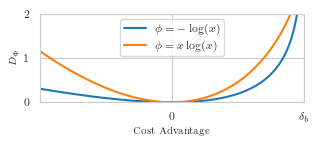

In [6]:
limit = 3

def d_c_barrier(x):
    return np.log(limit/(limit-x)) - x/limit

def d_c_entropy(x):
    return x - (limit-x)*np.log(limit/(limit-x))

_, ax = plt.subplots(1, 1, figsize=(3.32, 1.5))

x = np.linspace(-limit, limit-1e-6, 1000)
ax.plot(x, d_c_barrier(x), label=r"$\phi=-\log(x)$")
ax.plot(x, d_c_entropy(x), label=r"$\phi=x\log(x)$")
ax.set_xlim(-limit, limit)
ax.set_ylim(0, 2)

ax.set_xticks([-limit, 0., limit])
ax.set_xticklabels(["", "0", r"$\delta_b$"])

ax.set_xlabel(r"Cost Advantage")
ax.set_ylabel(r"$D_\Phi$")

ax.legend()

plt.tight_layout()

plt.savefig("../graphics/div_advantage.pdf")

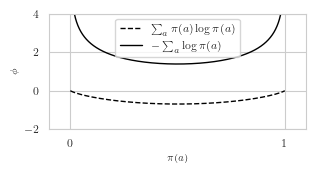

In [22]:
_, axs = plt.subplots(1, 1, figsize=(3.32, 1.5))

x = np.linspace(0+1e-6, 1-1e-6, 1000)

axs.plot(x, x*np.log(x) + (1-x)*np.log(1-x), label=r"$\sum_a\pi(a)\log \pi(a)$", linestyle="dashed", color="black", linewidth=1)
axs.plot(x, -np.log(x) -np.log(1-x), label=r"$-\sum_a\log \pi(a)$", color="black", linewidth=1)

axs.legend()
axs.set_xlim(-0.1, 1.1)
axs.set_ylim(-2, 4)
axs.set_xlabel(r"$\pi(a)$")
axs.set_ylabel(r"$\phi$")

axs.set_xticks([0., 1.])
#axs.set_xticklabels(["0", r"$J_c = b$", "1"])